In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

In [21]:
df=pd.read_csv("Customer Purchasing Behaviors.csv")

In [22]:
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,region,purchase_frequency
0,1,25,45000,200,4.5,North,12
1,2,34,55000,350,7.0,South,18
2,3,45,65000,500,8.0,West,22
3,4,22,30000,150,3.0,East,10
4,5,29,47000,220,4.8,North,13


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             238 non-null    int64  
 1   age                 238 non-null    int64  
 2   annual_income       238 non-null    int64  
 3   purchase_amount     238 non-null    int64  
 4   loyalty_score       238 non-null    float64
 5   region              238 non-null    object 
 6   purchase_frequency  238 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 13.1+ KB


In [24]:
df.describe()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,119.500000,38.676471,57407.563025,425.630252,6.794118,19.798319
std,68.848868,9.351118,11403.875717,140.052062,1.899047,4.562884
min,1.000000,22.000000,30000.000000,150.000000,3.000000,10.000000
25%,60.250000,31.000000,50000.000000,320.000000,5.500000,17.000000
50%,119.500000,39.000000,59000.000000,440.000000,7.000000,20.000000
75%,178.750000,46.750000,66750.000000,527.500000,8.275000,23.000000
max,238.000000,55.000000,75000.000000,640.000000,9.500000,28.000000


In [25]:
df.isnull().sum()

user_id               0
age                   0
annual_income         0
purchase_amount       0
loyalty_score         0
region                0
purchase_frequency    0
dtype: int64

In [26]:
df.duplicated().sum()

0

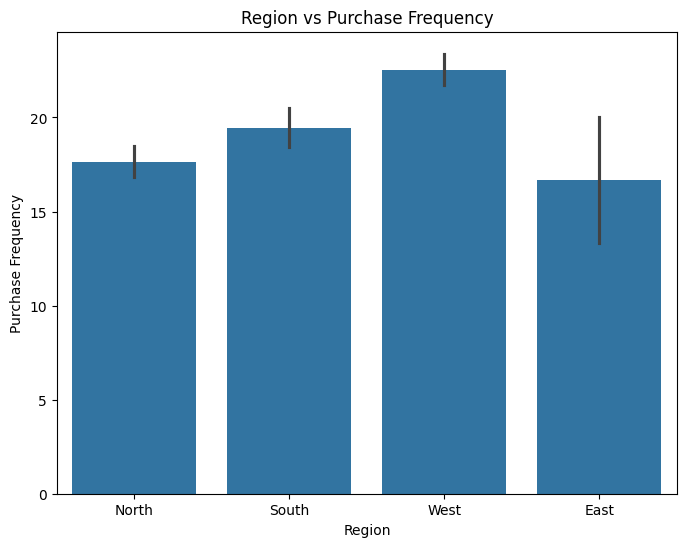

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x='region',y='purchase_frequency',data=df)
plt.title('Region vs Purchase Frequency')
plt.xlabel('Region')
plt.ylabel('Purchase Frequency')
plt.show()

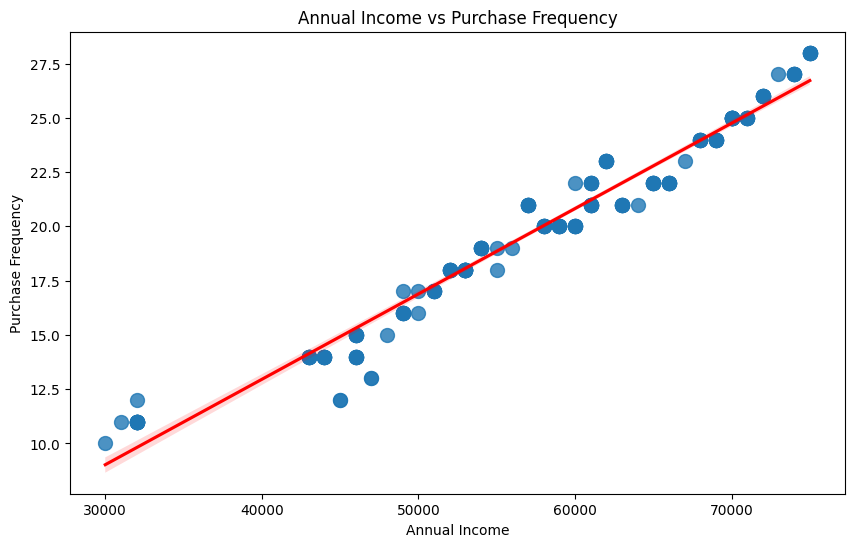

In [28]:
plt.figure(figsize=(10, 6))
sns.regplot(x='annual_income', y='purchase_frequency', data=df, scatter_kws={'s': 100}, line_kws={"color": "red"})
plt.title('Annual Income vs Purchase Frequency')
plt.xlabel('Annual Income')
plt.ylabel('Purchase Frequency')
plt.show()

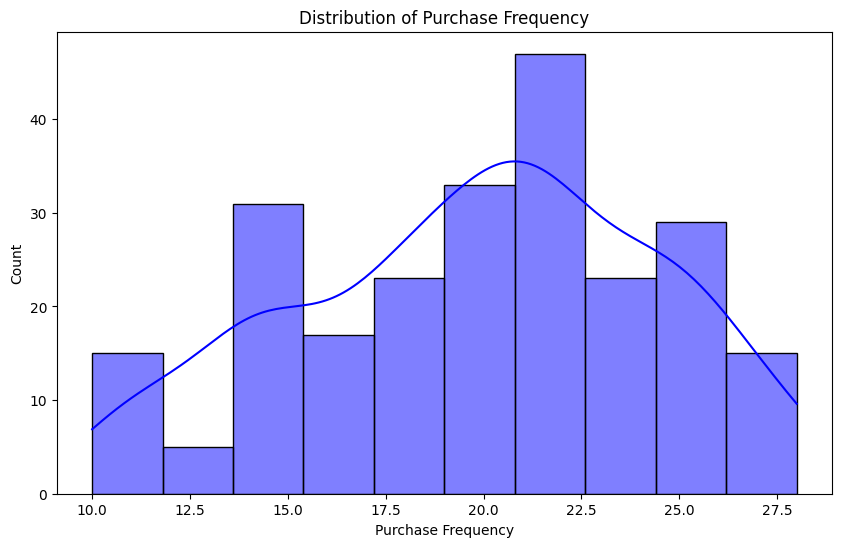

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(df['purchase_frequency'], kde=True, bins=10, color='blue')
plt.title('Distribution of Purchase Frequency')
plt.xlabel('Purchase Frequency')
plt.ylabel('Count')
plt.show()

In [30]:
df=pd.get_dummies(df,columns=['region'])
df=df.astype(int)
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency,region_East,region_North,region_South,region_West
0,1,25,45000,200,4,12,0,1,0,0
1,2,34,55000,350,7,18,0,0,1,0
2,3,45,65000,500,8,22,0,0,0,1
3,4,22,30000,150,3,10,1,0,0,0
4,5,29,47000,220,4,13,0,1,0,0


In [31]:
scaler=StandardScaler()
df[['user_id','age','annual_income','purchase_amount','loyalty_score']]=scaler.fit_transform(df[['user_id','age','annual_income','purchase_amount','loyalty_score']])
df.head()

,user_id,age,annual_income,purchase_amount,loyalty_score,purchase_frequency,region_East,region_North,region_South,region_West
0,-1.724789,-1.465632,-1.090306,-1.614441,-1.291854,12,0,1,0,0
1,-1.710233,-0.501151,-0.211563,-0.541153,0.292998,18,0,0,1,0
2,-1.695678,0.677658,0.667180,0.532134,0.821282,22,0,0,0,1
3,-1.681123,-1.787125,-2.408420,-1.972203,-1.820138,10,1,0,0,0
4,-1.666568,-1.036974,-0.914557,-1.471336,-1.291854,13,0,1,0,0


In [32]:
X=df.drop(['purchase_frequency'],axis=1)
y=df['purchase_frequency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#LINEAR REGRESSION

In [34]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 score:{r2:.2f}")

print("coefficients\n",lr.coef_)
print("intercept\n",lr.intercept_)

Mean Squared Error: 0.25
R2 score:0.99
coefficients
 [ 8.43871835e-04  6.52262709e-02  7.35043883e-01  3.97391502e+00
 -2.29850253e-01  3.29977173e-01 -1.39879184e-01 -1.02592037e-01
 -8.75059518e-02]
intercept
 19.886556733859848


In [35]:
#DECISION TREE REGRESSOR

In [36]:
dt=DecisionTreeRegressor(
    max_depth=4,
    random_state=42
)
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.15
Mean Absolute Error (MAE): 0.21
R² Score: 0.99


In [37]:
#RANDOM FOREST REGRESSOR

In [38]:
rf=RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error: ",mse)
print(f"R2 score: {r2:.2f}")

Mean Squared Error:  0.07577916666666672
R2 score: 1.00
